In [1]:
# Importing the packages
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

## Data Loading ##

In [2]:
raw_data = pd.read_csv('/Users/haveeshya/Downloads/Tabular Data Visualization Haveeshya Kandhiraju/jfk_weather.csv',low_memory=False)
raw_data

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,REPORTTPYE,HOURLYSKYCONDITIONS,HOURLYVISIBILITY,HOURLYPRSENTWEATHERTYPE,HOURLYDRYBULBTEMPF,HOURLYDRYBULBTEMPC,HOURLYWETBULBTEMPF,HOURLYWETBULBTEMPC,HOURLYDewPointTempF,HOURLYDewPointTempC,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYWindGustSpeed,HOURLYStationPressure,HOURLYPressureTendency,HOURLYPressureChange,HOURLYSeaLevelPressure,HOURLYPrecip,...,MonthlyGreatestPrecip,MonthlyGreatestPrecipDate,MonthlyGreatestSnowfall,MonthlyGreatestSnowfallDate,MonthlyGreatestSnowDepth,MonthlyGreatestSnowDepthDate,MonthlyDaysWithGT90Temp,MonthlyDaysWithLT32Temp,MonthlyDaysWithGT32Temp,MonthlyDaysWithLT0Temp,MonthlyDaysWithGT001Precip,MonthlyDaysWithGT010Precip,MonthlyDaysWithGT1Snow,MonthlyMaxSeaLevelPressureValue,MonthlyMaxSeaLevelPressureDate,MonthlyMaxSeaLevelPressureTime,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureDate,MonthlyMinSeaLevelPressureTime,MonthlyTotalHeatingDegreeDays,MonthlyTotalCoolingDegreeDays,MonthlyDeptFromNormalHeatingDD,MonthlyDeptFromNormalCoolingDD,MonthlyTotalSeasonToDateHeatingDD,MonthlyTotalSeasonToDateCoolingDD
0,WBAN:94789,JFK INTERNATIONAL AIRPORT NY US,3.4,40.6386,-73.7622,2010-01-01 00:51,FM-15,FEW:02 7 SCT:04 13 BKN:07 29,6.00,-RA:02 PL:06 BR:1 |RA:61 PL:74 |RA:61 PL:79,33,0.6,32,0.1,31,-0.6,92,0,000,NaN,29.97,8.0,NaN,29.99,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
1,WBAN:94789,JFK INTERNATIONAL AIRPORT NY US,3.4,40.6386,-73.7622,2010-01-01 01:00,FM-12,NaN,5.59,||PL:79,33,0.6,32,0.1,31,-0.6,92,0,000,NaN,29.96,8.0,+0.05,29.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
2,WBAN:94789,JFK INTERNATIONAL AIRPORT NY US,3.4,40.6386,-73.7622,2010-01-01 01:51,FM-15,FEW:02 6 SCT:04 13 OVC:08 35,6.00,-RA:02 PL:06 BR:1 |RA:61 PL:74 |RA:61 PL:79,33,0.6,33,0.3,32,0.0,96,0,000,NaN,29.97,NaN,NaN,29.99,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
3,WBAN:94789,JFK INTERNATIONAL AIRPORT NY US,3.4,40.6386,-73.7622,2010-01-01 02:03,FM-16,FEW:02 6 SCT:04 13 OVC:08 35,6.00,-RA:02 BR:1 |RA:61 |RA:61,34,1.0,33,0.7,32,0.0,93,0,000,NaN,29.97,NaN,NaN,NaN,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
4,WBAN:94789,JFK INTERNATIONAL AIRPORT NY US,3.4,40.6386,-73.7622,2010-01-01 02:28,FM-16,BKN:07 7 BKN:07 15 OVC:08 35,5.00,-RA:02 BR:1 |RA:61 |RA:61,34,1.0,33,0.7,32,0.0,93,0,000,NaN,29.97,NaN,NaN,NaN,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114540,WBAN:94789,JFK INTERNATIONAL AIRPORT NY US,3.4,40.6386,-73.7622,2018-07-27 20:26,FM-16,FEW:02 22 SCT:04 55 OVC:08 80,10.00,-RA:02 |RA:61 |RA:61,70,21.1,69,20.8,69,20.6,97,5,080,NaN,30.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
114541,WBAN:94789,JFK INTERNATIONAL AIRPORT NY US,3.4,40.6386,-73.7622,2018-07-27 20:51,FM-15,SCT:04 32 BKN:07 75 BKN:07 90,10.00,||RA:61,71,21.7,70,21.3,70,21.1,96,0,000,NaN,30.02,NaN,NaN,30.04,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
114542,WBAN:94789,JFK INTERNATIONAL AIRPORT NY US,3.4,40.6386,-73.7622,2018-07-27 21:51,FM-15,FEW:02 32 SCT:04 65 BKN:07 120,10.00,NaN,72,22.2,71,21.5,70,21.1,94,5,050,NaN,30.00,0.0,NaN,30.02,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
114543,WBAN:94789,JFK INTERNATIONAL AIRPORT NY US,3.4,40.6386,-73.7622,2018-07-27 22:51,FM-15,BKN:07 100 OVC:08 130,10.00,NaN,72,22.2

In [3]:
column_subset = [
    'DATE',
    'HOURLYVISIBILITY',
    'HOURLYDRYBULBTEMPF',
    'HOURLYWETBULBTEMPF',
    'HOURLYDewPointTempF',
    'HOURLYRelativeHumidity',
    'HOURLYWindSpeed',
    'HOURLYWindDirection',
    'HOURLYStationPressure',
    'HOURLYPressureTendency',
    'HOURLYPrecip',
    'HOURLYSeaLevelPressure'
]

hourly_data = raw_data[column_subset]
hourly_data = hourly_data.set_index(pd.DatetimeIndex(hourly_data['DATE']))
hourly_data.drop(['DATE'], axis=1, inplace=True)
hourly_data.replace(to_replace='*', value=np.nan, inplace=True)
hourly_data.head()

,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYStationPressure,HOURLYPressureTendency,HOURLYPrecip,HOURLYSeaLevelPressure
DATE,,,,,,,,,,,
2010-01-01 00:51:00,6.00,33,32,31,92,0,000,29.97,8.0,0.01,29.99
2010-01-01 01:00:00,5.59,33,32,31,92,0,000,29.96,8.0,NaN,29.99
2010-01-01 01:51:00,6.00,33,33,32,96,0,000,29.97,NaN,0.02,29.99
2010-01-01 02:03:00,6.00,34,33,32,93,0,000,29.97,NaN,T,NaN
2010-01-01 02:28:00,5.00,34,33,32,93,0,000,29.97,NaN,T,NaN


In [4]:
hourly_data.dtypes

HOURLYVISIBILITY           object
HOURLYDRYBULBTEMPF         object
HOURLYWETBULBTEMPF         object
HOURLYDewPointTempF        object
HOURLYRelativeHumidity     object
HOURLYWindSpeed            object
HOURLYWindDirection        object
HOURLYStationPressure      object
HOURLYPressureTendency    float64
HOURLYPrecip               object
HOURLYSeaLevelPressure     object
dtype: object

In [5]:
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114545 entries, 2010-01-01 00:51:00 to 2018-07-27 23:59:00
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   HOURLYVISIBILITY        96464 non-null   object 
 1   HOURLYDRYBULBTEMPF      111403 non-null  object 
 2   HOURLYWETBULBTEMPF      111245 non-null  object 
 3   HOURLYDewPointTempF     111395 non-null  object 
 4   HOURLYRelativeHumidity  111395 non-null  object 
 5   HOURLYWindSpeed         111358 non-null  object 
 6   HOURLYWindDirection     111237 non-null  object 
 7   HOURLYStationPressure   111256 non-null  object 
 8   HOURLYPressureTendency  48038 non-null   float64
 9   HOURLYPrecip            79763 non-null   object 
 10  HOURLYSeaLevelPressure  99522 non-null   object 
dtypes: float64(1), object(10)
memory usage: 10.5+ MB


## Data Cleaning ##

In [6]:
hourly_date= hourly_data.fillna(0)
hourly_data=hourly_data.fillna(0.0)
hourly_data

,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYStationPressure,HOURLYPressureTendency,HOURLYPrecip,HOURLYSeaLevelPressure
DATE,,,,,,,,,,,
2010-01-01 00:51:00,6.00,33,32,31,92,0,000,29.97,8.0,0.01,29.99
2010-01-01 01:00:00,5.59,33,32,31,92,0,000,29.96,8.0,0.0,29.99
2010-01-01 01:51:00,6.00,33,33,32,96,0,000,29.97,0.0,0.02,29.99
2010-01-01 02:03:00,6.00,34,33,32,93,0,000,29.97,0.0,T,0.0
2010-01-01 02:28:00,5.00,34,33,32,93,0,000,29.97,0.0,T,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2018-07-27 20:26:00,10.00,70,69,69,97,5,080,30.00,0.0,0.0,0.0
2018-07-27 20:51:00,10.00,71,70,70,96,0,000,30.02,0.0,0.01,30.04
2018-07-27 21:51:00,10.00,72,71,70,94,5,050,30.00,0.0,T,30.02


In [7]:
hourly_data['HOURLYPrecip'].replace(to_replace='T', value='0.00', inplace=True)
hourly_data['HOURLYPrecip'].replace('0.020.01s', '0.0', inplace=True)
hourly_data.replace(np.nan, '0.0', inplace=True)

In [8]:
hourly_data.isnull().values.any()

False

In [9]:
messy_columns = column_subset[1:]

# Convert columns to float32 datatype
for i in messy_columns:
    hourly_data[i] = hourly_data[i].apply(
        lambda x: re.sub('[^0-9,.-]', '', x)
        if type(x) == str else x).replace('', np.nan).astype(('float32'))

In [10]:
print(hourly_data.info())
print()
hourly_data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114545 entries, 2010-01-01 00:51:00 to 2018-07-27 23:59:00
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   HOURLYVISIBILITY        114545 non-null  float32
 1   HOURLYDRYBULBTEMPF      114545 non-null  float32
 2   HOURLYWETBULBTEMPF      114545 non-null  float32
 3   HOURLYDewPointTempF     114545 non-null  float32
 4   HOURLYRelativeHumidity  114545 non-null  float32
 5   HOURLYWindSpeed         114545 non-null  float32
 6   HOURLYWindDirection     113752 non-null  float32
 7   HOURLYStationPressure   114545 non-null  float32
 8   HOURLYPressureTendency  114545 non-null  float32
 9   HOURLYPrecip            114545 non-null  float32
 10  HOURLYSeaLevelPressure  114545 non-null  float32
dtypes: float32(11)
memory usage: 5.7 MB
None



,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYStationPressure,HOURLYPressureTendency,HOURLYPrecip,HOURLYSeaLevelPressure
DATE,,,,,,,,,,,
2010-01-01 00:51:00,6.00,33.0,32.0,31.0,92.0,0.0,0.0,29.969999,8.0,0.01,29.99
2010-01-01 01:00:00,5.59,33.0,32.0,31.0,92.0,0.0,0.0,29.959999,8.0,0.00,29.99
2010-01-01 01:51:00,6.00,33.0,33.0,32.0,96.0,0.0,0.0,29.969999,0.0,0.02,29.99
2010-01-01 02:03:00,6.00,34.0,33.0,32.0,93.0,0.0,0.0,29.969999,0.0,0.00,0.00
2010-01-01 02:28:00,5.00,34.0,33.0,32.0,93.0,0.0,0.0,29.969999,0.0,0.00,0.00


### Data Manipulation to turn the data into more useful information ###

In [11]:
# Resample (downsample) to hourly rows (we're shifting everything up by 9 minutes!)
hourly_data = hourly_data.resample('60min').last().shift(periods=1)  # noqa Note: use resample('60min') to resample on the 51st of every hour
hourly_data

,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYStationPressure,HOURLYPressureTendency,HOURLYPrecip,HOURLYSeaLevelPressure
DATE,,,,,,,,,,,
2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,6.0,33.0,32.0,31.0,92.0,0.0,0.0,29.969999,8.0,0.01,29.990000
2010-01-01 02:00:00,6.0,33.0,33.0,32.0,96.0,0.0,0.0,29.969999,0.0,0.02,29.990000
2010-01-01 03:00:00,5.0,33.0,33.0,32.0,96.0,0.0,0.0,29.969999,0.0,0.00,29.990000
2010-01-01 04:00:00,5.0,33.0,33.0,32.0,96.0,0.0,0.0,29.950001,8.0,0.00,29.969999
...,...,...,...,...,...,...,...,...,...,...,...
2018-07-27 19:00:00,10.0,76.0,73.0,72.0,88.0,3.0,230.0,30.000000,3.0,0.00,30.020000
2018-07-27 20:00:00,4.0,69.0,69.0,69.0,100.0,13.0,40.0,29.990000,0.0,1.16,30.010000
2018-07-27 21:00:00,10.0,71.0,70.0,70.0,96.0,0.0,0.0,30.020000,0.0,0.01,30.040001


In [12]:
hourly_data['HOURLYPressureTendency'] =\
hourly_data['HOURLYPressureTendency'].fillna(method='ffill')  # fill with last valid observation
hourly_data.drop(hourly_data.index[0], inplace=True)  # drop first row
hourly_data

,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYStationPressure,HOURLYPressureTendency,HOURLYPrecip,HOURLYSeaLevelPressure
DATE,,,,,,,,,,,
2010-01-01 01:00:00,6.0,33.0,32.0,31.0,92.0,0.0,0.0,29.969999,8.0,0.01,29.990000
2010-01-01 02:00:00,6.0,33.0,33.0,32.0,96.0,0.0,0.0,29.969999,0.0,0.02,29.990000
2010-01-01 03:00:00,5.0,33.0,33.0,32.0,96.0,0.0,0.0,29.969999,0.0,0.00,29.990000
2010-01-01 04:00:00,5.0,33.0,33.0,32.0,96.0,0.0,0.0,29.950001,8.0,0.00,29.969999
2010-01-01 05:00:00,5.0,33.0,32.0,31.0,92.0,0.0,0.0,29.930000,0.0,0.00,29.959999
...,...,...,...,...,...,...,...,...,...,...,...
2018-07-27 19:00:00,10.0,76.0,73.0,72.0,88.0,3.0,230.0,30.000000,3.0,0.00,30.020000
2018-07-27 20:00:00,4.0,69.0,69.0,69.0,100.0,13.0,40.0,29.990000,0.0,1.16,30.010000
2018-07-27 21:00:00,10.0,71.0,70.0,70.0,96.0,0.0,0.0,30.020000,0.0,0.01,30.040001


In [13]:
print(hourly_data.info())
print()
hourly_data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75119 entries, 2010-01-01 01:00:00 to 2018-07-27 23:00:00
Freq: 60T
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HOURLYVISIBILITY        75117 non-null  float32
 1   HOURLYDRYBULBTEMPF      75117 non-null  float32
 2   HOURLYWETBULBTEMPF      75117 non-null  float32
 3   HOURLYDewPointTempF     75117 non-null  float32
 4   HOURLYRelativeHumidity  75117 non-null  float32
 5   HOURLYWindSpeed         75117 non-null  float32
 6   HOURLYWindDirection     74690 non-null  float32
 7   HOURLYStationPressure   75117 non-null  float32
 8   HOURLYPressureTendency  75119 non-null  float32
 9   HOURLYPrecip            75117 non-null  float32
 10  HOURLYSeaLevelPressure  75117 non-null  float32
dtypes: float32(11)
memory usage: 3.7 MB
None



,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYStationPressure,HOURLYPressureTendency,HOURLYPrecip,HOURLYSeaLevelPressure
DATE,,,,,,,,,,,
2010-01-01 01:00:00,6.0,33.0,32.0,31.0,92.0,0.0,0.0,29.969999,8.0,0.01,29.990000
2010-01-01 02:00:00,6.0,33.0,33.0,32.0,96.0,0.0,0.0,29.969999,0.0,0.02,29.990000
2010-01-01 03:00:00,5.0,33.0,33.0,32.0,96.0,0.0,0.0,29.969999,0.0,0.00,29.990000
2010-01-01 04:00:00,5.0,33.0,33.0,32.0,96.0,0.0,0.0,29.950001,8.0,0.00,29.969999
2010-01-01 05:00:00,5.0,33.0,32.0,31.0,92.0,0.0,0.0,29.930000,0.0,0.00,29.959999


## Data Analysis using Descriptive Statistics ##

In [14]:
hourly_data.describe()

,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYStationPressure,HOURLYPressureTendency,HOURLYPrecip,HOURLYSeaLevelPressure
count,75117.000000,75117.000000,75117.000000,75117.000000,75117.000000,75117.000000,74690.000000,75117.000000,75119.000000,75117.000000,75117.000000
mean,8.812470,53.148926,47.239758,40.634903,61.871922,10.844110,188.460968,28.708204,1.412173,0.004424,28.605160
std,2.855075,20.347261,18.752192,20.956755,23.396959,6.386269,112.168243,6.105585,2.576457,0.033164,6.380647
min,0.000000,0.000000,-1.000000,-19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,40.000000,35.000000,25.000000,46.000000,7.000000,90.000000,29.840000,0.000000,0.000000,29.860001
50%,10.000000,54.000000,49.000000,43.000000,64.000000,10.000000,200.000000,29.990000,0.000000,0.000000,30.010000
75%,10.000000,70.000000,63.000000,58.000000,81.000000,15.000000,290.000000,30.139999,1.000000,0.000000,30.170000
max,14.000000,102.000000,85.000000,84.000000,100.000000,53.000000,360.000000,30.830000,8.000000,2.410000,30.850000


In [15]:
agg_df = hourly_data.copy()

hourlydrybulbtempf_mean = agg_df['HOURLYDRYBULBTEMPF'].mean()
print('hourlydrybulbtempf_mean: ',hourlydrybulbtempf_mean)

hourlydrybulbtempf_med = agg_df['HOURLYDRYBULBTEMPF'].median()
print('hourlydrybulbtempf_med: ',hourlydrybulbtempf_med)

hourlydrybulbtempf_std = agg_df['HOURLYDRYBULBTEMPF'].std()
print('hourlydrybulbtempf_std: ',hourlydrybulbtempf_std)
print()

hourlywetbulbtempf_mean = agg_df['HOURLYWETBULBTEMPF'].mean()
print('hourlywetbulbtempf_mean: ',hourlywetbulbtempf_mean)

hourlywetbulbtempf_med = agg_df['HOURLYWETBULBTEMPF'].median()
print('hourlywetbulbtempf_med: ',hourlywetbulbtempf_med)

hourlywetbulbtempf_std = agg_df['HOURLYWETBULBTEMPF'].std()
print('hourlywetbulbtempf_std: ',hourlywetbulbtempf_std)
print()

hourlydewpointtempf_mean = agg_df['HOURLYDewPointTempF'].mean()
print('hourlydewpointtempf_mean: ',hourlydewpointtempf_mean)

hourlydewpointtempf_med = agg_df['HOURLYDewPointTempF'].median()
print('hourlydewpointtempf_med: ',hourlydewpointtempf_med)

hourlydewpointtempf_std = agg_df['HOURLYDewPointTempF'].std()
print('hourlydewpointtempf_std: ',hourlydewpointtempf_std)

hourlydrybulbtempf_mean:  53.148926
hourlydrybulbtempf_med:  54.0
hourlydrybulbtempf_std:  20.347261428833008

hourlywetbulbtempf_mean:  47.239758
hourlywetbulbtempf_med:  49.0
hourlywetbulbtempf_std:  18.7521915435791

hourlydewpointtempf_mean:  40.634903
hourlydewpointtempf_med:  43.0
hourlydewpointtempf_std:  20.956754684448242


### Data Aggregation ###

In [16]:
agg_df['Date_without_timestamp']=agg_df.index.date
agg_df

Hourlystationpressure_minimum=agg_df.groupby('Date_without_timestamp')['HOURLYStationPressure'].min()
Hourlystationpressure_maximum=agg_df.groupby('Date_without_timestamp')['HOURLYStationPressure'].max()

print('Hourlystationpressure_minimum values:')
print(Hourlystationpressure_minimum)
print()
print('Hourlystationpressure_maximum values:')
print(Hourlystationpressure_maximum)


Hourlystationpressure_minimum values:
Date_without_timestamp
2010-01-01    29.709999
2010-01-02     0.000000
2010-01-03     0.000000
2010-01-04     0.000000
2010-01-05     0.000000
                ...    
2018-07-23     0.000000
2018-07-24     0.000000
2018-07-25     0.000000
2018-07-26     0.000000
2018-07-27     0.000000
Name: HOURLYStationPressure, Length: 3130, dtype: float32

Hourlystationpressure_maximum values:
Date_without_timestamp
2010-01-01    29.969999
2010-01-02    29.680000
2010-01-03    29.610001
2010-01-04    29.740000
2010-01-05    29.740000
                ...    
2018-07-23    30.180000
2018-07-24    30.190001
2018-07-25    30.080000
2018-07-26    29.930000
2018-07-27    30.020000
Name: HOURLYStationPressure, Length: 3130, dtype: float32


In [17]:
Hourlypressuretendency_minimum=agg_df.groupby('Date_without_timestamp')['HOURLYPressureTendency'].min()
Hourlypressuretendency_maximum=agg_df.groupby('Date_without_timestamp')['HOURLYPressureTendency'].max()

print('Hourlypressuretendency_minimum values:')
print(Hourlypressuretendency_minimum)
print()
print('Hourlypressuretendency_maximum values:')
print(Hourlypressuretendency_maximum)


Hourlypressuretendency_minimum values:
Date_without_timestamp
2010-01-01    0.0
2010-01-02    0.0
2010-01-03    0.0
2010-01-04    0.0
2010-01-05    0.0
             ... 
2018-07-23    0.0
2018-07-24    0.0
2018-07-25    0.0
2018-07-26    0.0
2018-07-27    0.0
Name: HOURLYPressureTendency, Length: 3130, dtype: float32

Hourlypressuretendency_maximum values:
Date_without_timestamp
2010-01-01    8.0
2010-01-02    8.0
2010-01-03    8.0
2010-01-04    8.0
2010-01-05    8.0
             ... 
2018-07-23    8.0
2018-07-24    8.0
2018-07-25    8.0
2018-07-26    7.0
2018-07-27    8.0
Name: HOURLYPressureTendency, Length: 3130, dtype: float32


In [18]:
HOURLYSeaLevelPressure_minimum=agg_df.groupby('Date_without_timestamp')['HOURLYSeaLevelPressure'].min()
HOURLYSeaLevelPressure_maximum=agg_df.groupby('Date_without_timestamp')['HOURLYSeaLevelPressure'].max()

print('HOURLYSeaLevelPressure_minimum values:')
print(HOURLYSeaLevelPressure_minimum)
print()
print('HOURLYSeaLevelPressure_maximum values:')
print(HOURLYSeaLevelPressure_maximum)


HOURLYSeaLevelPressure_minimum values:
Date_without_timestamp
2010-01-01    29.73
2010-01-02     0.00
2010-01-03     0.00
2010-01-04     0.00
2010-01-05     0.00
              ...  
2018-07-23     0.00
2018-07-24     0.00
2018-07-25     0.00
2018-07-26     0.00
2018-07-27     0.00
Name: HOURLYSeaLevelPressure, Length: 3130, dtype: float32

HOURLYSeaLevelPressure_maximum values:
Date_without_timestamp
2010-01-01    29.990000
2010-01-02    29.700001
2010-01-03    29.629999
2010-01-04    29.760000
2010-01-05    29.760000
                ...    
2018-07-23    30.200001
2018-07-24    30.219999
2018-07-25    30.100000
2018-07-26    29.950001
2018-07-27    30.040001
Name: HOURLYSeaLevelPressure, Length: 3130, dtype: float32


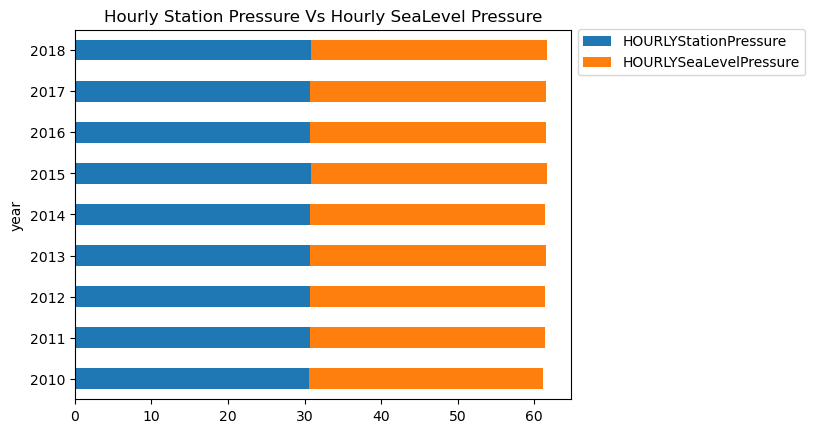

In [19]:
agg_df['year']=pd.to_datetime(agg_df['Date_without_timestamp']).dt.strftime('%Y')
HOURLYSeaLevelPressure_maximum=agg_df.groupby('year')['HOURLYSeaLevelPressure'].max()
Hourlystationpressure_maximum=agg_df.groupby('year')['HOURLYStationPressure'].max()
agg_maximum_pressure=pd.concat([Hourlystationpressure_maximum,HOURLYSeaLevelPressure_maximum],axis=1)

ax=agg_maximum_pressure.plot(kind="barh", rot=0, stacked=True)
ax.set_title('Hourly Station Pressure Vs Hourly SeaLevel Pressure')
ax.legend(bbox_to_anchor=(1, 1.02))

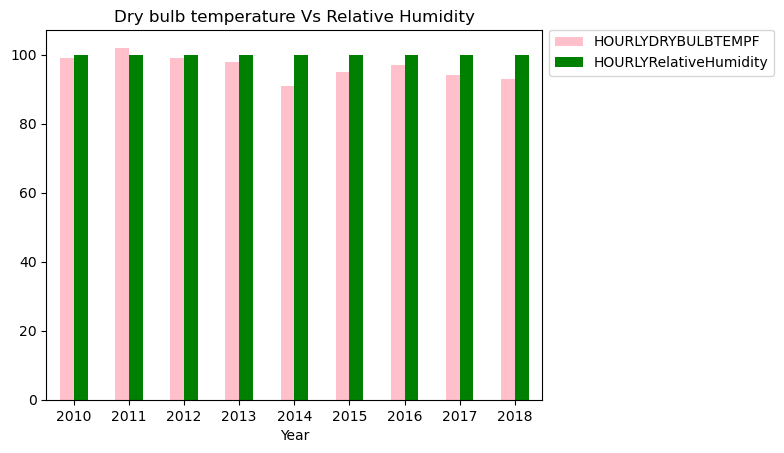

In [20]:
HOURLYDRYBULBTEMPF_maximum=agg_df.groupby('year')['HOURLYDRYBULBTEMPF'].max()
HOURLYRelativeHumidity_maximum=agg_df.groupby('year')['HOURLYRelativeHumidity'].max()
agg_maximum_pressure=pd.concat([HOURLYDRYBULBTEMPF_maximum,HOURLYRelativeHumidity_maximum],axis=1)

ax=agg_maximum_pressure.plot(kind="bar", rot=0, color=['Pink','Green'])
ax.set_xlabel('Year')
ax.set_title('Dry bulb temperature Vs Relative Humidity')
ax.legend(bbox_to_anchor=(1, 1.02))

## Data Visualization ##

In [21]:
# define the new column names
columns_new_name = [
    'visibility',
    'dry_bulb_temp_f',
    'wet_bulb_temp_f',
    'dew_point_temp_f',
    'relative_humidity',
    'wind_speed',
    'station_pressure',
    'sea_level_pressure',
    'precip',
    'altimeter_setting',
    'wind_direction',
    'pressure_tendency',
    'pressure_tendency_const'
]

columns_name_map =\
    {c: columns_new_name[i] for i, c in enumerate(hourly_data.columns)}

data = hourly_data.rename(columns=columns_name_map)
data

,visibility,dry_bulb_temp_f,wet_bulb_temp_f,dew_point_temp_f,relative_humidity,wind_speed,station_pressure,sea_level_pressure,precip,altimeter_setting,wind_direction
DATE,,,,,,,,,,,
2010-01-01 01:00:00,6.0,33.0,32.0,31.0,92.0,0.0,0.0,29.969999,8.0,0.01,29.990000
2010-01-01 02:00:00,6.0,33.0,33.0,32.0,96.0,0.0,0.0,29.969999,0.0,0.02,29.990000
2010-01-01 03:00:00,5.0,33.0,33.0,32.0,96.0,0.0,0.0,29.969999,0.0,0.00,29.990000
2010-01-01 04:00:00,5.0,33.0,33.0,32.0,96.0,0.0,0.0,29.950001,8.0,0.00,29.969999
2010-01-01 05:00:00,5.0,33.0,32.0,31.0,92.0,0.0,0.0,29.930000,0.0,0.00,29.959999
...,...,...,...,...,...,...,...,...,...,...,...
2018-07-27 19:00:00,10.0,76.0,73.0,72.0,88.0,3.0,230.0,30.000000,3.0,0.00,30.020000
2018-07-27 20:00:00,4.0,69.0,69.0,69.0,100.0,13.0,40.0,29.990000,0.0,1.16,30.010000
2018-07-27 21:00:00,10.0,71.0,70.0,70.0,96.0,0.0,0.0,30.020000,0.0,0.01,30.040001


In [22]:
plot_cols = ['dry_bulb_temp_f', 'relative_humidity', 'wind_speed', 'station_pressure', 'precip']

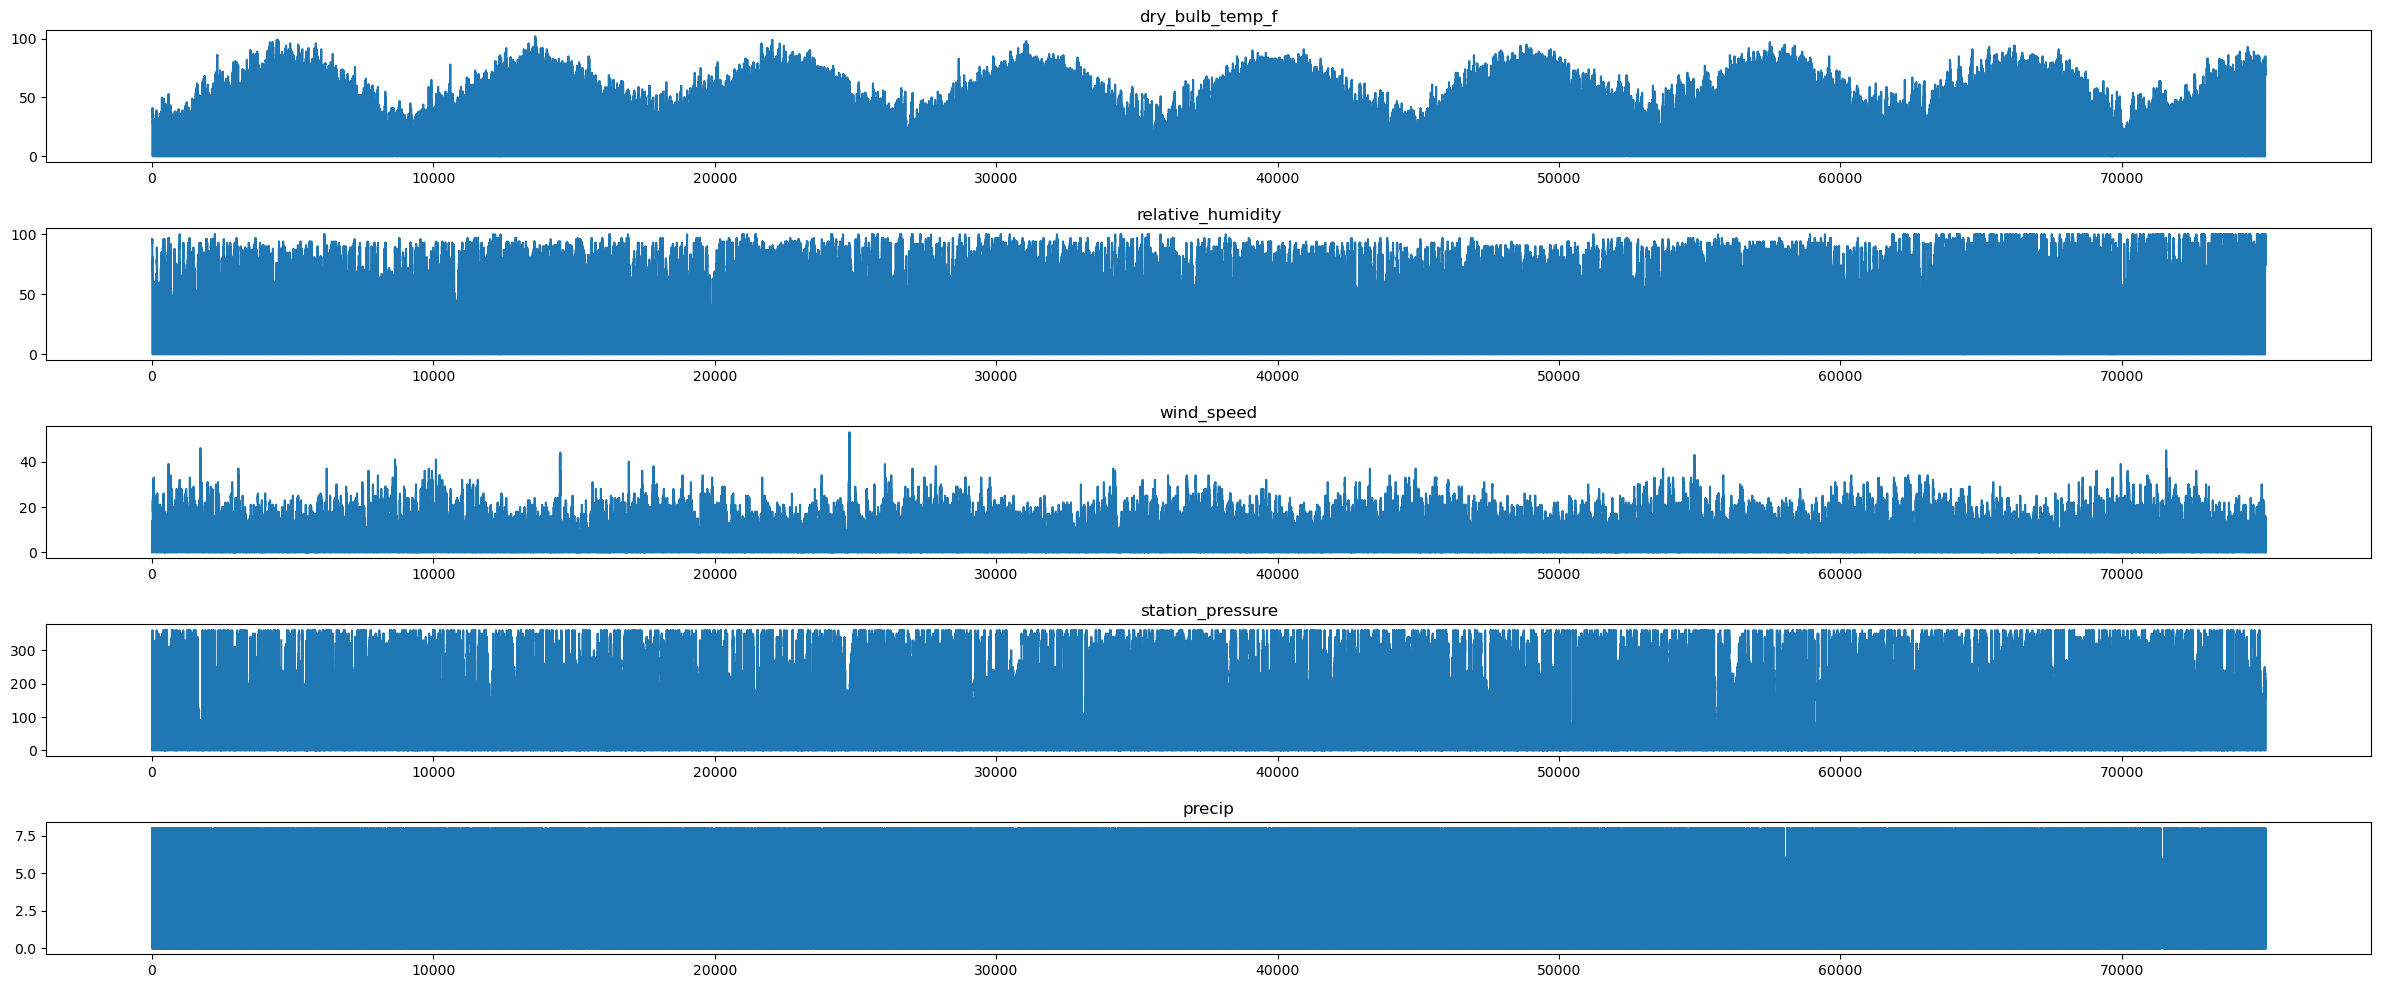

In [23]:
plt.figure(figsize=(30, 12))
i = 1
for col in plot_cols:
    plt.subplot(len(plot_cols), 1, i)
    plt.plot(data[col].values)
    plt.title(col)
    i += 1
plt.subplots_adjust(hspace=0.5)
plt.show()

### Question: Plot the correlation for the columns dry_bulb_temp_f, wet_bulb_temp_f, dew_point_temp_f,  relative_humidity and precip using a Heat map and mention the marks and channels ###

### Solution: Below plot shows the correlation between the columns of the data frame. We can observe a strong positive correlation between dry bulb and wet bulb temperatures ###
### Marks:  Points ###
### Channels: Color by attribute ###

Text(0.5, 1.2, 'Correlation Matrix')

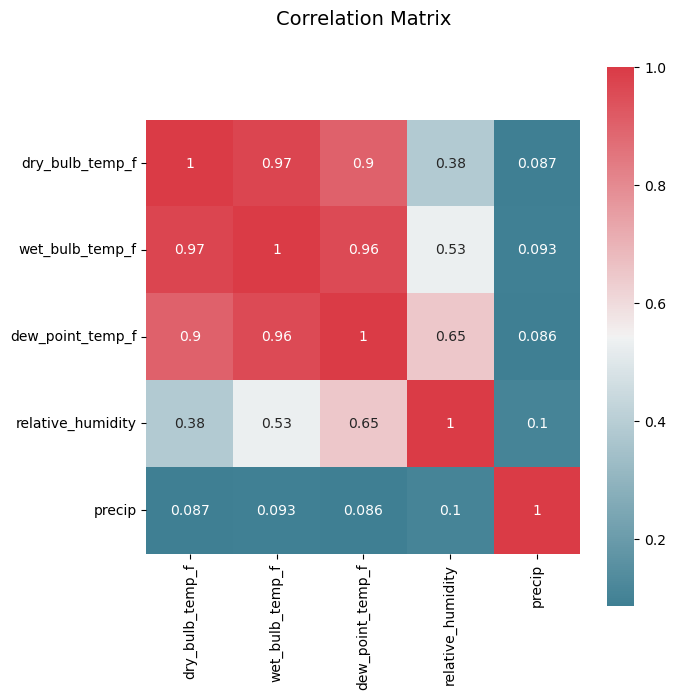

In [24]:
# Plot correlation matrix
plot_cols_correlation = ['dry_bulb_temp_f', 'wet_bulb_temp_f', 'dew_point_temp_f', 'relative_humidity', 'precip']
f, ax = plt.subplots(figsize=(7, 7))
corr = data[plot_cols_correlation].corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax).set_title("Correlation Matrix", y=1.2, fontsize = 14)

### Question: Show the yearly Temperature variations in Fahrenheit by month for all the years ranging from 2010 to 2018 and analyze the temperature values of maximum and minimum points ###
### Plot used to visualize: Line Plot ###
### Marks: Point AND line connection marks between them ###
### Channels: Horizontal Position, Vertical Position ###
### Solution: The plot shows the variation of temperature by month for all the years ranging from 2010 to 2018. The peak value of the temperature is observed to be above 80F in between the years 2012 and 2013. And, the lowest point is recorded below 20F in between the years 2014 and 2015. ###

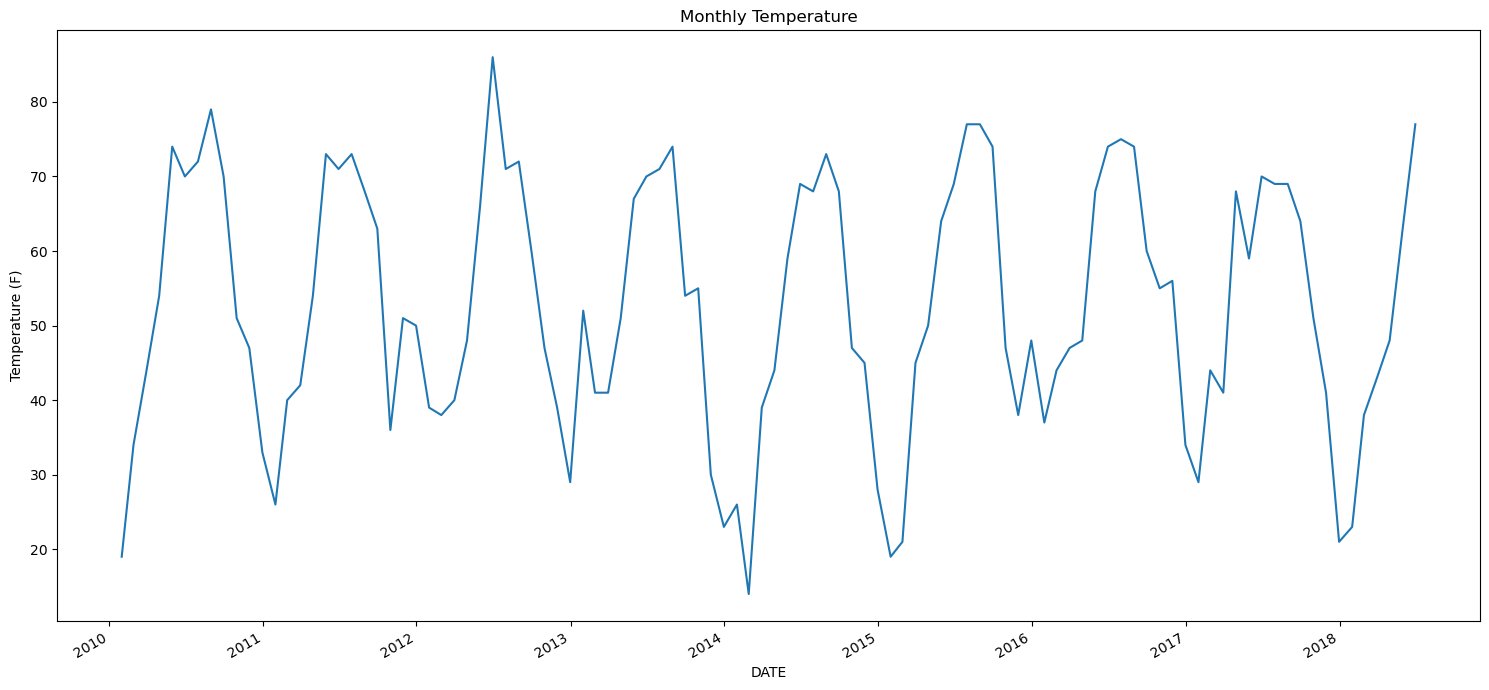

In [25]:
plt.figure(figsize=(15, 7))

TEMP_COL = 'dry_bulb_temp_f'
# Plot temperature data converted to a monthly frequency
data[TEMP_COL].asfreq('M').plot()
plt.title('Monthly Temperature')
plt.ylabel('Temperature (F)')
plt.tight_layout()
plt.show()

### Question: Compare the montly temperature variations for the years 2015, 2016 and provide the observations ###
### Plot used to visualize: Bar Plot ###
### Marks: Line ###
### Channels: Length, color hue, seperated horizontally and aligned vertically ###
### Solution: Temperatures are observed to be high in the month of August for both the years 2015 and 2016. In the year 2015, the lowest temperateure of around 24F is recorded in the month of February and for the year 2016, the lowest is observed to be 33F that is recorded in the month of January ###

### It is observed that the temperatures are raising until the mid of the year (July, August) and dropped gradually for the next half of the year for both 2015 and 2016 ###

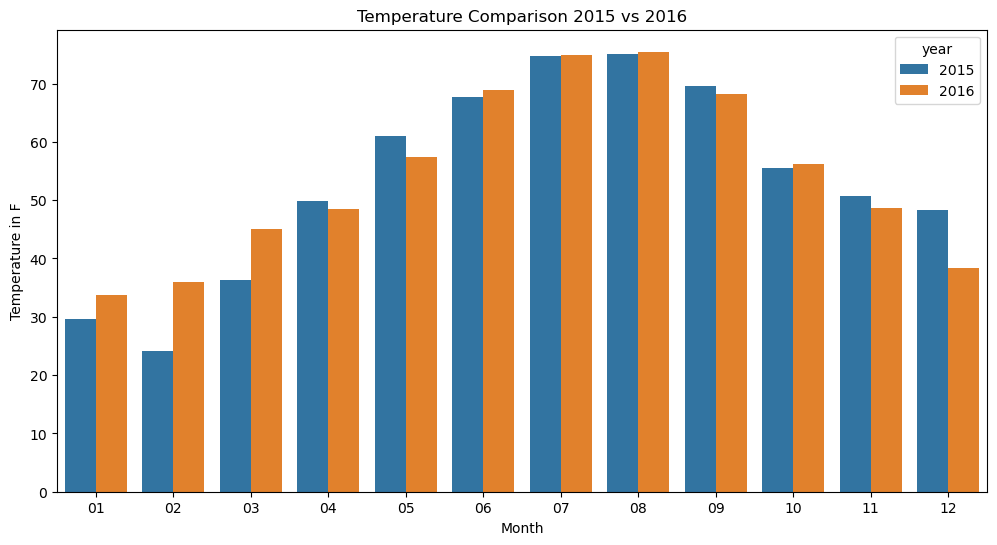

In [26]:
data.reset_index(inplace=True)
df10=data[['dry_bulb_temp_f','wet_bulb_temp_f','dew_point_temp_f','relative_humidity']]
df10['Date_without_timestamp']=pd.to_datetime(data['DATE']).dt.date
df10['year_month']=pd.to_datetime(df10['Date_without_timestamp']).dt.strftime('%Y-%m')
df10['year']=pd.to_datetime(df10['Date_without_timestamp']).dt.strftime('%Y')
df10['month']=pd.to_datetime(df10['Date_without_timestamp']).dt.strftime('%m')
df10

df10=df10[(df10['year']=='2015') | (df10['year']=='2016')]
plt.subplots(figsize=(12,6))
sns.barplot(x='month',y='dry_bulb_temp_f', hue='year', data=df10, ci=None)
plt.xlabel('Month')
plt.ylabel('Temperature in F')
plt.title('Temperature Comparison 2015 vs 2016');

### Question: For the year 2015, plot the variations of maximum values of Dry Bulb temperature, Wet bulb temperature and Dew point temperature and provide the observations recorded ###
### Plot used to visualize: Line Plot ###
### Marks: Point AND line connection marks between them ###
### Channels: Color, Horizontal Position, Vertical Position ###

### Solution: The maximum dry bulb temperature is higher than the dew point and wet bulb temperatures. It is also noticeable that there is not much difference in the wet bulb and dew point curves ###

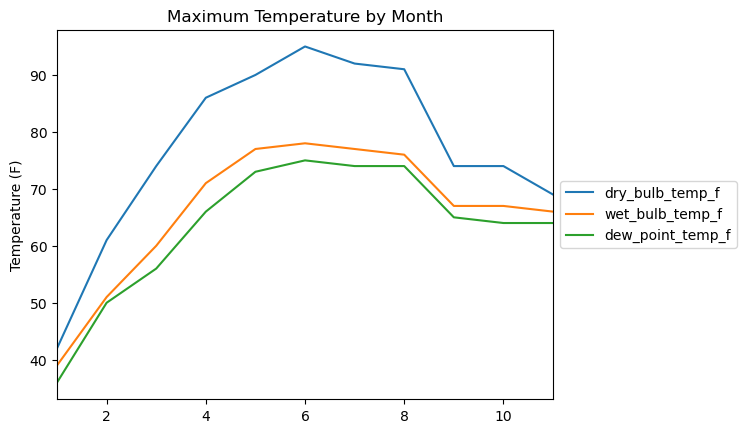

In [27]:
df11=df10[['dry_bulb_temp_f','wet_bulb_temp_f','dew_point_temp_f','relative_humidity','year_month', 'year', 'month']]
df11=df11[(df11['year']=='2015')]
df11=df11.groupby([(df11['month'])])['dry_bulb_temp_f','wet_bulb_temp_f','dew_point_temp_f'].max().reset_index()
ax = df11[['dry_bulb_temp_f','wet_bulb_temp_f','dew_point_temp_f']].plot();
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Temperature (F)')
ax.set_xlim(1,11)
ax.set_title('Maximum Temperature by Month');

In [28]:
newdf = data.copy()
newdf.set_index('DATE', inplace=True)
newdf

,visibility,dry_bulb_temp_f,wet_bulb_temp_f,dew_point_temp_f,relative_humidity,wind_speed,station_pressure,sea_level_pressure,precip,altimeter_setting,wind_direction
DATE,,,,,,,,,,,
2010-01-01 01:00:00,6.0,33.0,32.0,31.0,92.0,0.0,0.0,29.969999,8.0,0.01,29.990000
2010-01-01 02:00:00,6.0,33.0,33.0,32.0,96.0,0.0,0.0,29.969999,0.0,0.02,29.990000
2010-01-01 03:00:00,5.0,33.0,33.0,32.0,96.0,0.0,0.0,29.969999,0.0,0.00,29.990000
2010-01-01 04:00:00,5.0,33.0,33.0,32.0,96.0,0.0,0.0,29.950001,8.0,0.00,29.969999
2010-01-01 05:00:00,5.0,33.0,32.0,31.0,92.0,0.0,0.0,29.930000,0.0,0.00,29.959999
...,...,...,...,...,...,...,...,...,...,...,...
2018-07-27 19:00:00,10.0,76.0,73.0,72.0,88.0,3.0,230.0,30.000000,3.0,0.00,30.020000
2018-07-27 20:00:00,4.0,69.0,69.0,69.0,100.0,13.0,40.0,29.990000,0.0,1.16,30.010000
2018-07-27 21:00:00,10.0,71.0,70.0,70.0,96.0,0.0,0.0,30.020000,0.0,0.01,30.040001


In [29]:
newdf.index = pd.to_datetime(newdf.index)

def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'

newdf['Season'] = newdf.index.to_series().dt.month.map(get_season)
newdf

,visibility,dry_bulb_temp_f,wet_bulb_temp_f,dew_point_temp_f,relative_humidity,wind_speed,station_pressure,sea_level_pressure,precip,altimeter_setting,wind_direction,Season
DATE,,,,,,,,,,,,
2010-01-01 01:00:00,6.0,33.0,32.0,31.0,92.0,0.0,0.0,29.969999,8.0,0.01,29.990000,winter
2010-01-01 02:00:00,6.0,33.0,33.0,32.0,96.0,0.0,0.0,29.969999,0.0,0.02,29.990000,winter
2010-01-01 03:00:00,5.0,33.0,33.0,32.0,96.0,0.0,0.0,29.969999,0.0,0.00,29.990000,winter
2010-01-01 04:00:00,5.0,33.0,33.0,32.0,96.0,0.0,0.0,29.950001,8.0,0.00,29.969999,winter
2010-01-01 05:00:00,5.0,33.0,32.0,31.0,92.0,0.0,0.0,29.930000,0.0,0.00,29.959999,winter
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-27 19:00:00,10.0,76.0,73.0,72.0,88.0,3.0,230.0,30.000000,3.0,0.00,30.020000,summer
2018-07-27 20:00:00,4.0,69.0,69.0,69.0,100.0,13.0,40.0,29.990000,0.0,1.16,30.010000,summer
2018-07-27 21:00:00,10.0,71.0,70.0,70.0,96.0,0.0,0.0,30.020000,0.0,0.01,30.040001,summer


In [30]:
newdf.reset_index(inplace=True)
newdf

,DATE,visibility,dry_bulb_temp_f,wet_bulb_temp_f,dew_point_temp_f,relative_humidity,wind_speed,station_pressure,sea_level_pressure,precip,altimeter_setting,wind_direction,Season
0,2010-01-01 01:00:00,6.0,33.0,32.0,31.0,92.0,0.0,0.0,29.969999,8.0,0.01,29.990000,winter
1,2010-01-01 02:00:00,6.0,33.0,33.0,32.0,96.0,0.0,0.0,29.969999,0.0,0.02,29.990000,winter
2,2010-01-01 03:00:00,5.0,33.0,33.0,32.0,96.0,0.0,0.0,29.969999,0.0,0.00,29.990000,winter
3,2010-01-01 04:00:00,5.0,33.0,33.0,32.0,96.0,0.0,0.0,29.950001,8.0,0.00,29.969999,winter
4,2010-01-01 05:00:00,5.0,33.0,32.0,31.0,92.0,0.0,0.0,29.930000,0.0,0.00,29.959999,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75114,2018-07-27 19:00:00,10.0,76.0,73.0,72.0,88.0,3.0,230.0,30.000000,3.0,0.00,30.020000,summer
75115,2018-07-27 20:00:00,4.0,69.0,69.0,69.0,100.0,13.0,40.0,29.990000,0.0,1.16,30.010000,summer
75116,2018-07-27 21:00:00,10.0,71.0,70.0,70.0,96.0,0.0,0.0,30.020000,0.0,0.01,30.040001,summer
75117,2018-07-27 22:00:00,10.0,72.0,71.0,70.0,94.0,5.0,50.0,30.000000,0.0,0.00,30.020000,summer


In [31]:
newdf.set_index('Season', inplace=True)
newdf

,DATE,visibility,dry_bulb_temp_f,wet_bulb_temp_f,dew_point_temp_f,relative_humidity,wind_speed,station_pressure,sea_level_pressure,precip,altimeter_setting,wind_direction
Season,,,,,,,,,,,,
winter,2010-01-01 01:00:00,6.0,33.0,32.0,31.0,92.0,0.0,0.0,29.969999,8.0,0.01,29.990000
winter,2010-01-01 02:00:00,6.0,33.0,33.0,32.0,96.0,0.0,0.0,29.969999,0.0,0.02,29.990000
winter,2010-01-01 03:00:00,5.0,33.0,33.0,32.0,96.0,0.0,0.0,29.969999,0.0,0.00,29.990000
winter,2010-01-01 04:00:00,5.0,33.0,33.0,32.0,96.0,0.0,0.0,29.950001,8.0,0.00,29.969999
winter,2010-01-01 05:00:00,5.0,33.0,32.0,31.0,92.0,0.0,0.0,29.930000,0.0,0.00,29.959999
...,...,...,...,...,...,...,...,...,...,...,...,...
summer,2018-07-27 19:00:00,10.0,76.0,73.0,72.0,88.0,3.0,230.0,30.000000,3.0,0.00,30.020000
summer,2018-07-27 20:00:00,4.0,69.0,69.0,69.0,100.0,13.0,40.0,29.990000,0.0,1.16,30.010000
summer,2018-07-27 21:00:00,10.0,71.0,70.0,70.0,96.0,0.0,0.0,30.020000,0.0,0.01,30.040001


In [32]:
newdf= newdf[['dry_bulb_temp_f', 'DATE']]
newdf['year']=pd.to_datetime(newdf['DATE']).dt.strftime('%Y')
newdf=newdf[(newdf['year']=='2011') | (newdf['year']=='2012')]
newdf

,dry_bulb_temp_f,DATE,year
Season,,,
winter,0.0,2011-01-01 00:00:00,2011
winter,35.0,2011-01-01 01:00:00,2011
winter,33.0,2011-01-01 02:00:00,2011
winter,34.0,2011-01-01 03:00:00,2011
winter,35.0,2011-01-01 04:00:00,2011
...,...,...,...
winter,38.0,2012-12-31 19:00:00,2012
winter,38.0,2012-12-31 20:00:00,2012
winter,38.0,2012-12-31 21:00:00,2012


In [33]:
season_df = newdf.groupby('Season')['dry_bulb_temp_f'].mean()
season_df

Season
fall      55.901100
spring    51.334465
summer    72.186592
winter    36.400093
Name: dry_bulb_temp_f, dtype: float32

### Question: Compare the seasons of dry bulb temperature for the years 2011, 2012 and provide the observations ###
### Plot used to visualize: Pie Chart ###
### Marks: Area ###
### Channels: Angle seperated and aligned radially ###
### Solution: Below pie chart shows the seasonal percentages of dry bulb temperature for the years 2011, 2012. For the years 2011, and 2012, we see that the percentage of summers is high (33%), and winters are low (17%) ###

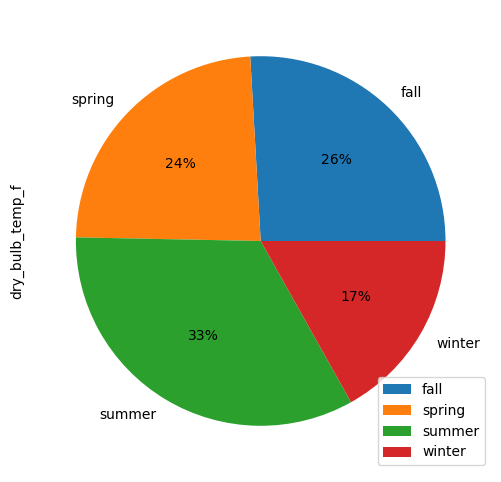

In [34]:
plot = season_df.plot.pie(y='dry_bulb_temp_f',autopct='%1.0f%%',
                    legend=True,figsize=(12,6),textprops = {"fontsize":10})
plt.legend(loc='lower right')
plt.show()